In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from sys import stdout
#import mysql.connector as mariadb
import pymysql as mariadb
mariadb_connection = mariadb.connect(user='resilience', 
                                     #password='resilience_password', 
                                     passwd='resilience_password',
                                     host='192.168.1.48',
                                     database='gmres_resilience')
cursor = mariadb_connection.cursor()

In [2]:
import gmres_display

In [3]:
def database_generator(keys, n = None, show_progress = True):

    cursor.execute("SELECT COUNT(*) from Experiment")
    if not n:
        n_rows = cursor.fetchone()[0]
    else:
        n_rows = n
    c_rows = 0
    
    request = "SELECT"
    first = True
    for key in keys:
        if not first:
            request += ","
        else:
            first = False
        request += " "
        if key == "faults":
            request += "fault_i, fault_k, fault_f, fault_bit, fault_reg"
        else:
            request += key
    request += " FROM Experiment"
    cursor.execute(request)
    row = cursor.fetchone()
    while row is not None:
        c_row = {}
        for i, key in enumerate(keys):
            if key == "faults":
                fault = {}
                fault["loc"] = {"i":row[i], "j":0, "k":row[i+1]}
                fault["timer"] = row[i+2]
                fault["bit"] = row[i+3]
                fault["register"] = row[i+4]
                c_row["faults"] = [fault] #TODO
                i += 5
            elif key == "l":
                c_row["iteration_count"] = row[i]
            elif key == "residuals":
                c_row["residuals"] = np.fromstring(row[i])
            else:
                c_row[key] = row[i]
        c_rows += 1
        if show_progress:
            new_progress = (100 * c_rows) / n_rows
            stdout.write("\r%d %c " % (new_progress, '%'))
            stdout.flush()
        yield c_row
        if (c_rows == n):
            break
        row = cursor.fetchone()
    

In [4]:
def load(keys, show_progress = True):

    cursor.execute("SELECT COUNT(*) from Experiment")
    if not n:
        n_rows = cursor.fetchone()[0]
    else:
        n_rows = n
    c_rows = 0
    
    request = "SELECT"
    first = True
    for key in keys:
        if not first:
            request += ","
        else:
            first = False
        request += " "
        if key == "faults":
            request += "fault_i, fault_k, fault_f, fault_bit, fault_reg"
        else:
            request += key
    request += " FROM Experiment"
    cursor.execute(request)
    result = [{} for i in xrange(n_rows)]
    row = cursor.fetchone()
    while row is not None:
        for i, key in enumerate(keys):
            if key == "faults":
                fault = {}
                fault["loc"] = {"i":row[i], "j":0, "k":row[i+1]}
                fault["timer"] = row[i+2]
                fault["bit"] = row[i+3]
                fault["register"] = row[i+4]
                result[c_rows]["faults"] = [fault] #TODO
                i += 5
            elif key == "l":
                result[c_rows]["iteration_count"] = row[i]
            elif key == "residuals":
                result[c_rows][key] = np.fromstring(row[i])
            else:
                result[c_rows][key] = row[i]
        c_rows += 1
        if show_progress:
            new_progress = (100 * c_rows) / n_rows
            stdout.write("\r%d %c " % (new_progress, '%'))
            stdout.flush()
        row = cursor.fetchone()
    return result
    

10 % Rajat/rajat12


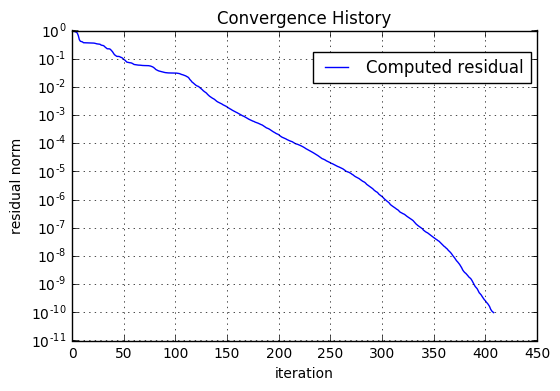

20 % Rajat/rajat12


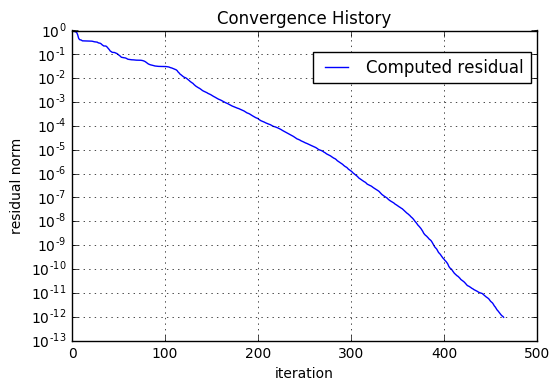

30 % Rajat/rajat12


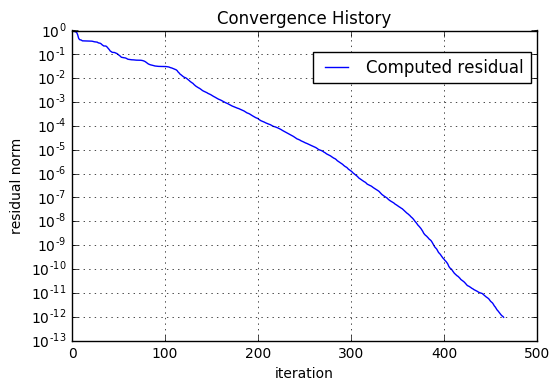

40 % Rajat/rajat12


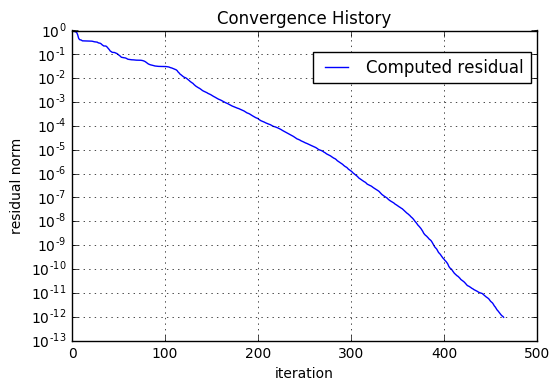

50 % Rajat/rajat12


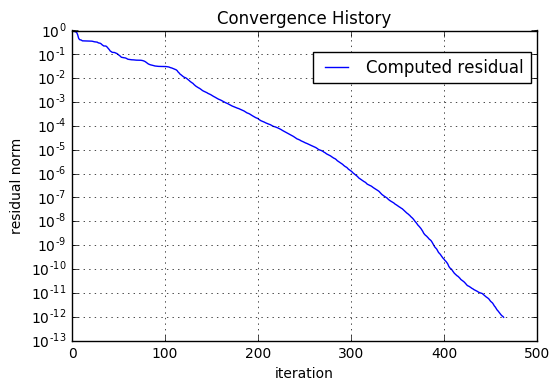

60 % Rajat/rajat12


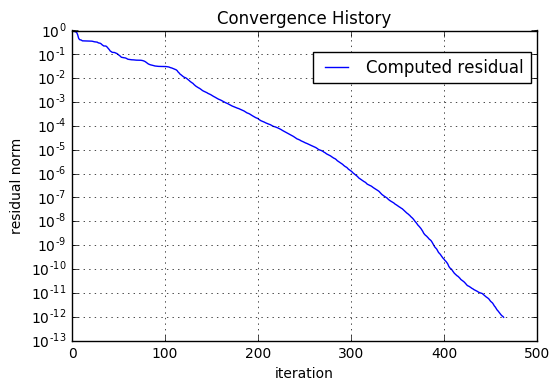

70 % Rajat/rajat12


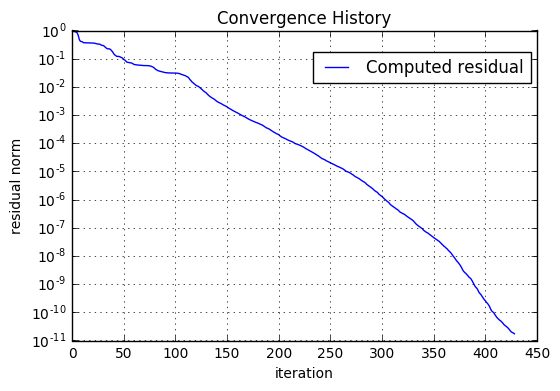

80 % HB/impcol_a


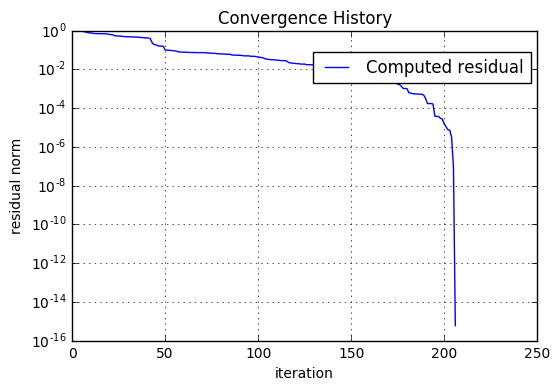

90 % Rajat/rajat12


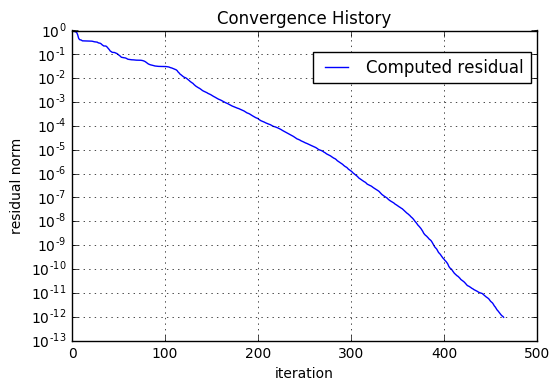

100 % Rajat/rajat12


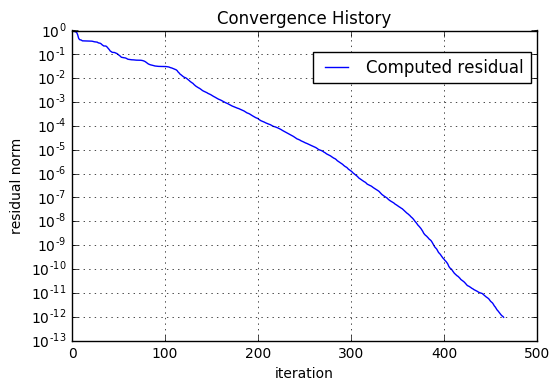

In [5]:
for d in database_generator(["LinearSystem", "residual", "residuals", "faults", "l"], 10):
    print d["LinearSystem"]
    gmres_display.convergence_history(d, true_residual = False)
    plt.show()

In [6]:
mariadb_connection.close()